# 🎓 Examen Final: SQL y Gestión de Datos (15 Puntos)

**Contexto:** Eres el Data Steward de la **Universidad Santo Tomás**. Se acerca el cierre de semestre y la decanatura requiere una gestión intensiva de la base de datos: desde registrar ofertas de última hora hasta generar los indicadores finales de deserción y carga académica.

**Instrucciones:**
* Asegúrate de tener el archivo **`universidad.db`** en esta misma carpeta.
* Cada punto tiene un valor de **1.0** sobre 15.
* Usa `conn.commit()` después de las sentencias de modificación (INSERT/UPDATE/DELETE).
* Usa `pd.read_sql_query` para las consultas de selección (SELECT).

---

In [14]:
# 🛠️ CONFIGURACIÓN INICIAL
import sqlite3
import pandas as pd
import os

db_filename = 'C:/Users/Sonia/Universidades/Datos/universidad.db'

if not os.path.exists(db_filename):
    print(f"⚠️ ERROR: No encuentro '{db_filename}'. Súbelo a esta carpeta.")
else:
    conn = sqlite3.connect(db_filename)
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = ON;")
    print(f"✅ Conectado a '{db_filename}'. ¡Listo para el examen!")

✅ Conectado a 'C:/Users/Sonia/Universidades/Datos/universidad.db'. ¡Listo para el examen!


## 📝 Sección 1: Gestión Académica (DML) - 5 Puntos

**1. Apertura de Curso (INSERT)**
La facultad abre un nuevo curso electivo.
* Inserta en la tabla `Cursos`:
    * Nombre: **'Big Data & AI'**
    * Créditos: **5**
    * ID Profesor: **20**

**2. Nuevo Ingreso (INSERT)**
Registra a un nuevo estudiante en la tabla `Estudiantes`:
    * Nombre: **'Lionel'**
    * Apellido: **'Messi'**
    * Email: **'lio@usta.edu.co'**
    * Fecha Ingreso: '2024-11-25'

**3. Matrícula Manual (INSERT)**
Matricula al estudiante 'Lionel Messi' en el curso de 'Big Data & AI' que acabas de crear.
* *Pista:* Necesitarás averiguar primero qué ID le asignó la base de datos a Lionel y al curso.
* Nota final: `NULL`.

**4. Corrección de Créditos (UPDATE)**
El comité curricular decidió que 5 créditos es demasiado.
* Actualiza el curso 'Big Data & AI' para que tenga **3 créditos**.

**5. Retiro Definitivo (DELETE)**
El estudiante con **ID = 10** se retira de la universidad.
* Elimina todos sus registros de la tabla `Inscripciones` (para mantener la integridad, primero borramos sus clases).

In [48]:
def ejecutar_sql(query, conexion=conn):
  """
  Toma una consulta SQL, la ejecuta y devuelve el resultado
  en una tabla de pandas para una visualización clara.
  """
  df = pd.read_sql_query(query, conexion)
  # Usamos display() porque en Colab presenta las tablas de forma más elegante.
  display(df)

ejecutar_sql("Select * FROM Cursos")
ejecutar_sql("Select * FROM Estudiantes")
ejecutar_sql("Select * FROM Profesores")
ejecutar_sql("Select * FROM Inscripciones") 


,id_curso,nombre_curso,creditos,id_profesor
0,1,Bases de Datos,4,2
1,2,Economía Avanzado,5,1
2,3,Inglés II,4,9
3,4,Economía II,5,13
4,5,Arte Aplicado,4,15
...,...,...,...,...
96,97,Economía Avanzado,2,10
97,98,Derecho Avanzado,3,14
98,99,Inglés III,3,36
99,100,Cálculo I,2,25


,id_estudiante,nombre,apellido,email,fecha_ingreso
0,1,Diego,Martinez,diego.martinez42@usantotomas.edu.co,2024-01-20
1,2,Lucia,Zainea,lucia.zainea87@usantotomas.edu.co,2024-01-20
2,3,Ricardo,Mendoza,ricardo.mendoza77@usantotomas.edu.co,2024-01-20
3,4,Ana,Rios,ana.rios10@usantotomas.edu.co,2024-01-20
4,5,Ana,Navarro,ana.navarro48@usantotomas.edu.co,2024-01-20
...,...,...,...,...,...
496,497,Jorge,Romero,jorge.romero11@usantotomas.edu.co,2024-01-20
497,498,Laura,Cardenas,laura.cardenas99@usantotomas.edu.co,2024-01-20
498,499,Felipe,Castillo,felipe.castillo36@usantotomas.edu.co,2024-01-20
499,500,David,Ruiz,david.ruiz90@usantotomas.edu.co,2024-01-20


,id_profesor,nombre,apellido,especialidad
0,1,David,Silva,Arte
1,2,Andres,Rios,Biología
2,3,Marta,Maya,IA
3,4,Andres,Navarro,Economía
4,5,David,Mora,Matemáticas Puras
5,6,Diego,Castillo,Química
6,7,Nicolas,Mendoza,Filosofía
7,8,Laura,Jimenez,IA
8,9,Ana,Diaz,Estadística
9,10,Hector,Torres,Historia


,id_inscripcion,id_estudiante,id_curso,fecha_inscripcion,nota_final
0,1,69,1,2024-02-01,3.8
1,2,298,1,2024-02-01,4.5
2,3,364,1,2024-02-01,1.9
3,4,116,1,2024-02-01,2.5
4,5,261,1,2024-02-01,2.5
...,...,...,...,...,...
2022,2023,500,40,2024-02-01,2.4
2023,2024,500,38,2024-02-01,1.8
2024,2025,500,60,2024-02-01,2.9
2025,2026,500,8,2024-02-01,2.1


In [55]:
# 1. Insertar curso si no existe
cursor.execute("SELECT id_curso FROM Cursos WHERE nombre_curso = 'Big Data & AI'")
curso = cursor.fetchone()

if curso is None:
    cursor.execute("""
        INSERT INTO Cursos (nombre_curso, creditos, id_profesor)
        VALUES ('Big Data & AI', 5, 20)
    """)
    conn.commit()

    cursor.execute("SELECT id_curso FROM Cursos WHERE nombre_curso = 'Big Data & AI'")
    curso = cursor.fetchone()
    print("Curso insertado con ID:", curso[0])
else:
    print("El curso ya existe con ID:", curso[0])

id_curso = curso[0]


# 2. Insertar estudiante si no existe
cursor.execute("SELECT id_estudiante FROM Estudiantes WHERE email = ?", ("lio@usta.edu.co",))
est = cursor.fetchone()

if est is None:
    cursor.execute("""
        INSERT INTO Estudiantes (nombre, apellido, email, fecha_ingreso)
        VALUES ('Lionel', 'Messi', 'lio@usta.edu.co', '2024-11-25')
    """)
    conn.commit()

    cursor.execute("SELECT id_estudiante FROM Estudiantes WHERE email = 'lio@usta.edu.co'")
    est = cursor.fetchone()
    print("Estudiante creado con ID:", est[0])
else:
    print("El estudiante ya existe con ID:", est[0])

id_estudiante = est[0]


# 3. Matricular estudiante sin duplicar registro
cursor.execute("""
    SELECT 1 FROM Inscripciones
    WHERE id_estudiante = ? AND id_curso = ?
""", (id_estudiante, id_curso))

ya_existe = cursor.fetchone()

if ya_existe:
    print("Lionel ya está inscrito en este curso. No se insertó nada.")
else:
    cursor.execute("""
        INSERT INTO Inscripciones (id_estudiante, id_curso, nota_final)
        VALUES (?, ?, NULL)
    """, (id_estudiante, id_curso))
    conn.commit()
    print(" Lionel fue matriculado correctamente.")

#4
# Verificar si el curso sigue con créditos incorrectos
cursor.execute("""
SELECT creditos 
FROM Cursos 
WHERE nombre_curso = 'Big Data & AI'
""")

dato = cursor.fetchone()

if dato is None:
    print("El curso no existe.")
else:
    creditos_actuales = dato[0]
    if creditos_actuales == 3:
        print("El curso ya tiene 3 créditos. No se hizo ningún cambio.")
    else:
        cursor.execute("""
        UPDATE Cursos
        SET creditos = 3
        WHERE nombre_curso = 'Big Data & AI'
        """)
        conn.commit()
        print("Créditos actualizados correctamente.")

#5
cursor.execute("SELECT 1 FROM Estudiantes WHERE id_estudiante = 10")
existe = cursor.fetchone()
if existe:
    cursor.execute("""
    DELETE FROM Inscripciones
    WHERE id_estudiante = 10
    """)    
    conn.commit()
    cursor.execute("""
    DELETE FROM Estudiantes
    WHERE id_estudiante = 10
    """)    
    conn.commit()
    print("Estudiante eliminado correctamente.")    
else:
    print("El estudiante con id 10 no existe. No se hizo ningún cambio.")




El curso ya existe con ID: 105
El estudiante ya existe con ID: 501
Lionel ya está inscrito en este curso. No se insertó nada.
El curso ya tiene 3 créditos. No se hizo ningún cambio.
El estudiante con id 10 no existe. No se hizo ningún cambio.


## 🔍 Sección 2: Consultas SQL (Analysis) - 6 Puntos

**6. Métricas Generales (Agregación)**
Calcula y muestra:
* Cantidad total de estudiantes.
* Cantidad total de cursos ofertados.
* Promedio de créditos de los cursos.

**7. Auditoría de Profesores (LEFT JOIN)**
Necesitamos ver la carga laboral completa.
* Lista **todos** los profesores (Nombre y Apellido) y el curso que dictan.
* **Condición:** Deben aparecer los profesores que **NO** tienen cursos asignados actualmente (valor NULL).

**8. Popularidad (GROUP BY)**
* Genera una lista con el `Nombre del Curso` y la **Cantidad de Estudiantes** inscritos en él.
* Ordena del más popular al menos popular.

**9. Cursos Masivos (HAVING)**
* Basado en la consulta anterior, filtra para mostrar solo los cursos que tienen **más de 20 estudiantes** inscritos.

**10. Búsqueda Inteligente (Subconsulta)**
* Obtén el nombre y apellido de los estudiantes inscritos en el curso **"Bases de Datos"**.
* **Reto:** No uses el ID=1 directamente. Usa una subconsulta `(SELECT id_curso FROM Cursos WHERE nombre_curso = 'Bases de Datos')`.

**11. Sábana de Notas (INNER JOIN Múltiple)**
* Genera un reporte detallado que contenga:
    * Nombre Estudiante | Apellido Estudiante | Nombre Curso | Nota Final | Nombre Profesor

In [57]:
# Espacio para Consultas SQL

# 6. Métricas Generales (Agregación)
print("=" * 60)
print("6. MÉTRICAS GENERALES")
print("=" * 60)
query_6 = """
SELECT
    (SELECT COUNT(*) FROM Estudiantes) AS total_estudiantes,
    (SELECT COUNT(*) FROM Cursos) AS total_cursos,
    (SELECT AVG(creditos) FROM Cursos) AS promedio_creditos;
"""
ejecutar_sql(query_6)

# 7. Auditoría de Profesores (LEFT JOIN)
print("\n" + "=" * 60)
print("7. AUDITORÍA DE PROFESORES (LEFT JOIN)")
print("=" * 60)
query_7 = """
SELECT 
    p.nombre,
    p.apellido,
    c.nombre_curso
FROM Profesores p
LEFT JOIN Cursos c ON p.id_profesor = c.id_profesor
ORDER BY p.nombre;
"""
ejecutar_sql(query_7)

# 8. Popularidad (GROUP BY)
print("\n" + "=" * 60)
print("8. POPULARIDAD DE CURSOS (GROUP BY)")
print("=" * 60)
query_8 = """
SELECT 
    c.nombre_curso,
    COUNT(i.id_estudiante) AS cantidad_estudiantes
FROM Cursos c
LEFT JOIN Inscripciones i ON c.id_curso = i.id_curso
GROUP BY c.id_curso, c.nombre_curso
ORDER BY cantidad_estudiantes DESC;
"""
ejecutar_sql(query_8)

# 9. Cursos Masivos (HAVING)
print("\n" + "=" * 60)
print("9. CURSOS MASIVOS (MÁS DE 20 ESTUDIANTES)")
print("=" * 60)
query_9 = """
SELECT 
    c.nombre_curso,
    COUNT(i.id_estudiante) AS cantidad_estudiantes
FROM Cursos c
LEFT JOIN Inscripciones i ON c.id_curso = i.id_curso
GROUP BY c.id_curso, c.nombre_curso
HAVING COUNT(i.id_estudiante) > 20
ORDER BY cantidad_estudiantes DESC;
"""
ejecutar_sql(query_9)

# 10. Búsqueda Inteligente (Subconsulta)
print("\n" + "=" * 60)
print("10. ESTUDIANTES EN 'BASES DE DATOS' (SUBCONSULTA)")
print("=" * 60)
query_10 = """
SELECT 
    e.nombre,
    e.apellido
FROM Estudiantes e
WHERE e.id_estudiante IN (
    SELECT i.id_estudiante 
    FROM Inscripciones i
    WHERE i.id_curso = (
        SELECT id_curso 
        FROM Cursos 
        WHERE nombre_curso = 'Bases de Datos'
    )
)
ORDER BY e.nombre;
"""
ejecutar_sql(query_10)

# 11. Sábana de Notas (INNER JOIN Múltiple)
print("\n" + "=" * 60)
print("11. SÁBANA DE NOTAS (INNER JOIN MÚLTIPLE)")
print("=" * 60)
query_11 = """
SELECT 
    e.nombre AS nombre_estudiante,
    e.apellido AS apellido_estudiante,
    c.nombre_curso,
    i.nota_final,
    p.nombre AS nombre_profesor
FROM Estudiantes e
INNER JOIN Inscripciones i ON e.id_estudiante = i.id_estudiante
INNER JOIN Cursos c ON i.id_curso = c.id_curso
INNER JOIN Profesores p ON c.id_profesor = p.id_profesor
ORDER BY e.apellido, e.nombre, c.nombre_curso;
"""
ejecutar_sql(query_11)

6. MÉTRICAS GENERALES


,total_estudiantes,total_cursos,promedio_creditos
0,500,101,2.70297



7. AUDITORÍA DE PROFESORES (LEFT JOIN)


,nombre,apellido,nombre_curso
0,Ana,Diaz,Inglés II
1,Ana,Diaz,Inglés III
2,Ana,Diaz,Programación Aplicado
3,Ana,Jimenez,Filosofía General
4,Ana,Jimenez,Historia III
...,...,...,...
107,Valeria,Zainea,Álgebra Básico
108,Valeria,Zainea,Álgebra General
109,Valeria,Pineda,Arte II
110,Valeria,Pineda,Biología General



8. POPULARIDAD DE CURSOS (GROUP BY)


,nombre_curso,cantidad_estudiantes
0,Bases de Datos,70
1,Estadística Aplicado,37
2,Álgebra General,30
3,Física Teórico,30
4,Arte General,27
...,...,...
96,Física Avanzado,12
97,Economía Avanzado,12
98,Programación III,10
99,Sociología Básico,9



9. CURSOS MASIVOS (MÁS DE 20 ESTUDIANTES)


,nombre_curso,cantidad_estudiantes
0,Bases de Datos,70
1,Estadística Aplicado,37
2,Álgebra General,30
3,Física Teórico,30
4,Arte General,27
5,Inglés Teórico,26
6,Sociología III,26
7,Ética III,25
8,Filosofía Básico,25
9,Estadística Teórico,25



10. ESTUDIANTES EN 'BASES DE DATOS' (SUBCONSULTA)


,nombre,apellido
0,Ana,Mendoza
1,Ana,Cardenas
2,Ana,Zainea
3,Andres,Jimenez
4,Andres,Perez
...,...,...
65,Sofia,Castillo
66,Sofia,Ortega
67,Valeria,Maya
68,Valeria,Navarro



11. SÁBANA DE NOTAS (INNER JOIN MÚLTIPLE)


,nombre_estudiante,apellido_estudiante,nombre_curso,nota_final,nombre_profesor
0,Ana,Cardenas,Bases de Datos,4.1,Andres
1,Ana,Cardenas,Biología General,1.7,Valeria
2,Ana,Cardenas,Cálculo I,2.9,Daniela
3,Ana,Cardenas,Economía Aplicado,3.4,Fernando
4,Andres,Cardenas,Arte I,2.7,Andres
...,...,...,...,...,...
2019,Valentina,Zainea,Programación Aplicado,3.6,David
2020,Valentina,Zainea,Programación Básico,3.5,Ricardo
2021,Valentina,Zainea,Álgebra General,2.9,Valeria
2022,Valentina,Zainea,Álgebra General,3.8,Valeria


## 📊 Sección 3: Analítica con Python (Pandas) - 4 Puntos

**12. Carga de Datos**
* Ejecuta la consulta del punto 11 (Sábana de Notas) y guárdala en un DataFrame llamado `df_notas`.
* Muestra las primeras 5 filas y usa `.info()` para verificar tipos de datos.

**13. Análisis de Riesgo**
* Filtra el DataFrame `df_notas` para encontrar a los estudiantes que van perdiendo (Nota < 3.0).
* Guárdalos en un nuevo DF `df_riesgo` y cuenta cuántos son.

**14. Tabla Pivote (Cruce de Variables)**
* Crea una tabla dinámica que muestre el **Promedio de Notas** (values) organizados por `Nombre Curso` (index) y `Nombre Profesor` (columns).

**15. Visualización (Gráfico)**
* Usando el DataFrame `df_notas`, crea un histograma o un gráfico de barras que muestre la distribución de las notas finales.
* *Opcional:* Un gráfico de barras con el Top 5 de cursos con más estudiantes.

✅ Reconectado a la base de datos.
12. CARGA DE DATOS - SÁBANA DE NOTAS

Primeras 5 filas del DataFrame:

Primeras 5 filas del DataFrame:


,nombre_estudiante,apellido_estudiante,nombre_curso,nota_final,nombre_profesor
0,Ana,Cardenas,Bases de Datos,4.1,Andres
1,Ana,Cardenas,Biología General,1.7,Valeria
2,Ana,Cardenas,Cálculo I,2.9,Daniela
3,Ana,Cardenas,Economía Aplicado,3.4,Fernando
4,Andres,Cardenas,Arte I,2.7,Andres



Información de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nombre_estudiante    2024 non-null   object 
 1   apellido_estudiante  2024 non-null   object 
 2   nombre_curso         2024 non-null   object 
 3   nota_final           2023 non-null   float64
 4   nombre_profesor      2024 non-null   object 
dtypes: float64(1), object(4)
memory usage: 79.2+ KB
None

13. ANÁLISIS DE RIESGO (Notas < 3.0)

Estudiantes en riesgo: 847
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nombre_estudiante    2024 non-null   object 
 1   apellido_estudiante  2024 non-null   object 
 2   nombre_curso         2024 non-null   object 
 3   nota_final           2023 n

,nombre_estudiante,apellido_estudiante,nombre_curso,nota_final,nombre_profesor
1,Ana,Cardenas,Biología General,1.7,Valeria
2,Ana,Cardenas,Cálculo I,2.9,Daniela
4,Andres,Cardenas,Arte I,2.7,Andres
13,Daniela,Cardenas,Biología III,2.3,Beatriz
20,David,Cardenas,Filosofía General,1.8,Ana
...,...,...,...,...,...
2011,Paula,Zainea,Sociología III,2.9,Valentina
2014,Sofia,Zainea,Programación Básico,2.5,Ricardo
2016,Valentina,Zainea,Arte II,2.6,Valeria
2017,Valentina,Zainea,Biología General,2.7,Valeria



14. TABLA PIVOTE - PROMEDIO DE NOTAS POR PROFESOR


,Promedio Notas,Cantidad Estudiantes
nombre_profesor,,
Laura,3.441,17
Gloria,3.425,52
Valentina,3.425,100
Hector,3.421,130
Kevin,3.366,38
Oscar,3.347,17
Camila,3.338,65
Mariana,3.311,9
Ricardo,3.287,126



15. VISUALIZACIÓN - DISTRIBUCIÓN DE NOTAS


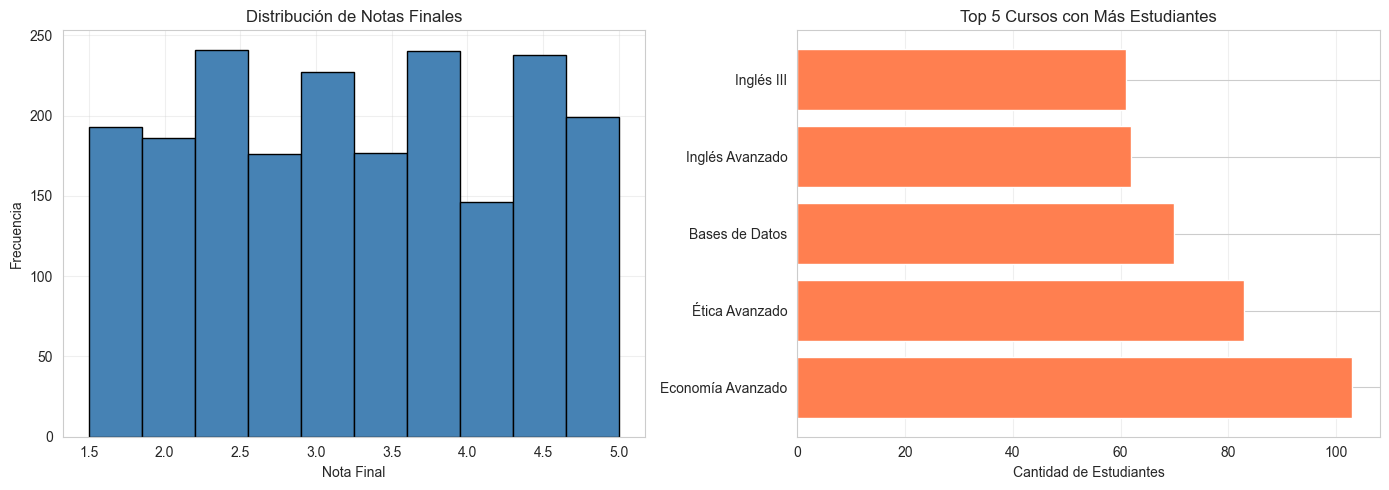


✅ Visualización completada.

🎓 ¡Examen Finalizado!


In [ ]:
df_notas = pd.read_sql_query(query_11_reload, conn)
print("\nPrimeras 5 filas del DataFrame:")
display(df_notas.head())
print("\nInformación de tipos de datos:")
print(df_notas.info())